# Guided Project: Popular Data Science Questions

## project background

In today's scenario, we're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms.

we will be figuring out what is best content to write about. Since we're passionate about helping people learn, we decide to scour the internet in search for the answer to the question "What is it that people want to learn about in data science?".

We will be exploring [Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com). To uncover which topics are the most popular in the website among its users.

Stack Exchange provides public database for its websites. you can find the Stack Exchanges's database in this [link](https://data.stackexchange.com/datascience/query/new).

## Exploring the database

After Exploring the database, some tables are looking promising in the quest for topics that interest Data Science Stack Exchange website vesitors:
- Posts
- Tags
- PostTags
- Badges

## Getting the Data

### Posts

We will be focusing on the columns that seem relevant towards our goal in the Posts table:
* __<mark>Id</mark>__: An identification number for the post
* __<mark>PostTypeId</mark>__: An identification number for the type of post.
* __<mark>CreationDate</mark>__: The date and time of creation of the post.
* __<mark>Score</mark>__: The post's score.
* __<mark>ViewCount</mark>__: How many times the post was viewed.
* __<mark>Tags</mark>__: What tags were used.
* __<mark>AnswerCount</mark>__: How many answers the question got (only applicable to question posts).
* __<mark>FavoriteCount</mark>__: How many times the question was favored (only applicable to question posts).

with the exception of the tags column, the last few columns contain information about how popular the post is — the kind of information we're after.

There are eight different types of post. Before we try to figure out which of them are relevant to us, let's check how many of them there are in 2019:

#### Query 2019  
<pre>
SELECT   
    P.PostTypeId,   
    PT.Name,
    Count(*) AS CountOfPosts 
FROM Posts  AS P
INNER JOIN PostTypes AS PT
  ON P.PostTypeId=PT.Id
where   

    YEAR(P.CreationDate) = 2019
GROUP BY P.PostTypeId,PT.Name
ORDER BY P.PostTypeId ASC  
</pre>


|PostTypeId|Name               |NrOfPosts|
|----------|-------------------|---------|
|     1    |Question           |6755     |
|     2    |Answer             |7693     |
|     3    |Wiki               |0        |
|     4	   |TagWikiExcerpt     |91       |  
|     5	   |TagWiki            |91       |
|     6	   |ModeratorNomination|8        |
|     7	   |WikiPlaceholder    |0        |
|     8	   |PrivilegeWiki      |0        |
Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. 

#### Posts Query
<pre>
select  
    Id,  
    PostTypeId,   
    CreationDate,   
    Score,  
    ViewCount,  
    Tags,   
    AnswerCount,  
    FavoriteCount   
from Posts  
where   
    PostTypeId = 1            -- Questions   
    AND  
    YEAR(CreationDate) = 2019; --Recent posts  
</pre>

## Exploring the Data

The result of the query was stored in a file called 2019_questions.csv

In [1]:
# importing libraries needed
import pandas as pd
# reading the data
questions= pd.read_csv("2019_questions.csv",parse_dates=["CreationDate"])
# exploring data
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [2]:
# exploring data
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


The __<mark>FavoriteCount</mark>__ is the only column with Null values, 7432 out of 8839 (about 84% of all questions).  
The __<mark>Tags</mark>__ column is really helpful for our further analysis since it has which topics the question was about. However its format not the best for our usage.

## Cleaning the Data
The __<mark>FavoriteCount</mark>__ column shows how many times the question was favored (only applicable to question posts).  
We found out that about 84% of it is a Null value which translates to that those questions have not been favoured by anyone, impeding 0 into those entries will be reasonable.   
 

In [3]:
# filling in null values
questions["FavoriteCount"] =questions["FavoriteCount"].fillna(0)
# changing data type to right one
# questions.info()
questions["FavoriteCount"] =questions["FavoriteCount"].astype(int)

what about __<mark>Tags</mark>__ we will transform it into a differnt format so as to make it more usable for our analysis.

In [4]:
# tranforming the Tags column
questions["Tags"] =questions["Tags"].str.replace("^<|>$", "").str.replace("><", ",")
questions["Tags"] = questions["Tags"].str.split(",")

In [5]:
# checking data after cleaning
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [6]:
# exploring data after cleaning
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


## Most Used and Most Viewed
We will now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

### Most Used Tags

In [7]:
# Counting Tags
tag_count_frequency = dict()
# counting tags loop
for tags in questions["Tags"]: #looping through data
    for tag in tags: # looping through each row 
        if tag in tag_count_frequency: # if tag is shown before increase its count by 1
            tag_count_frequency[tag] += 1
        else: # is tag showed for first time count it as 1st
            tag_count_frequency[tag] = 1

In [8]:
# formating the dict into a dataframe
tag_count_frequency= pd.DataFrame.from_dict(tag_count_frequency,orient="index")
tag_count_frequency= tag_count_frequency.rename(columns={0:"UsedFrequency"})
most_used_tags= tag_count_frequency.sort_values("UsedFrequency", ascending=False)
# showing the most used tags in descending order
most_used_tags

,UsedFrequency
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


we have 526 different unique tags with the top 20 most tags are as follows: 

In [9]:
top_twenty_used_tags=most_used_tags.head(20)
top_twenty_used_tags

,UsedFrequency
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


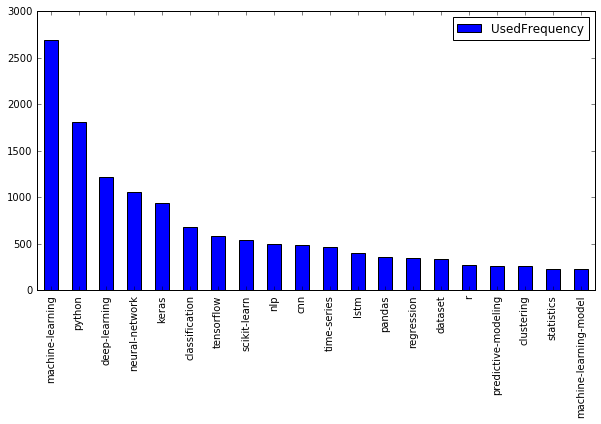

In [10]:
# importing needed libraries
import matplotlib.pyplot as plt
# plotting top 20 most used tags
%matplotlib inline
top_twenty_used_tags.plot.bar(figsize = (10,5))

### Most Viewed Tags

In [11]:
# Counting Tags
tag_view_frequency = dict()
# counting tags loop
for rownum, tags in enumerate(questions["Tags"]): #looping through data
    for tag in tags: # looping through each row 
        if tag in tag_view_frequency: # if tag is shown before increase its count by number of views
            tag_view_frequency[tag] += questions["ViewCount"].iloc[rownum]
        else: # is tag showed for first time count it as 1st
            tag_view_frequency[tag] = 1

In [12]:
# formating the dict into a dataframe
tag_view_frequency= pd.DataFrame.from_dict(tag_view_frequency,orient="index")
tag_view_frequency= tag_view_frequency.rename(columns={0:"ViewFrequency"})
most_viewed_tags= tag_view_frequency.sort_values("ViewFrequency", ascending=False)
# showing the most viewed tags in descending order
most_viewed_tags

,ViewFrequency
python,535935
machine-learning,388479
keras,268025
deep-learning,233045
pandas,200576
neural-network,185342
scikit-learn,128056
tensorflow,119560
classification,104397
dataframe,89281


Top twenty most viewed tags:

In [13]:
top_twenty_viewed_tags=most_viewed_tags.head(20)
top_twenty_viewed_tags

,ViewFrequency
python,535935
machine-learning,388479
keras,268025
deep-learning,233045
pandas,200576
neural-network,185342
scikit-learn,128056
tensorflow,119560
classification,104397
dataframe,89281


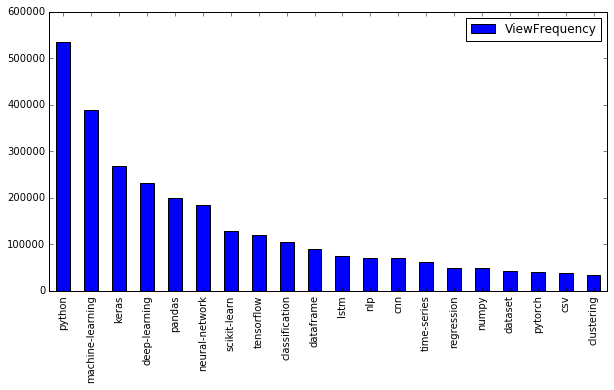

In [14]:
# plotting top 20 most viewed tags
%matplotlib inline
top_twenty_viewed_tags.plot.bar(figsize = (10,5))

Most used tags are seen also in the most viewed tags.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c0a6a6550>],
      dtype=object)

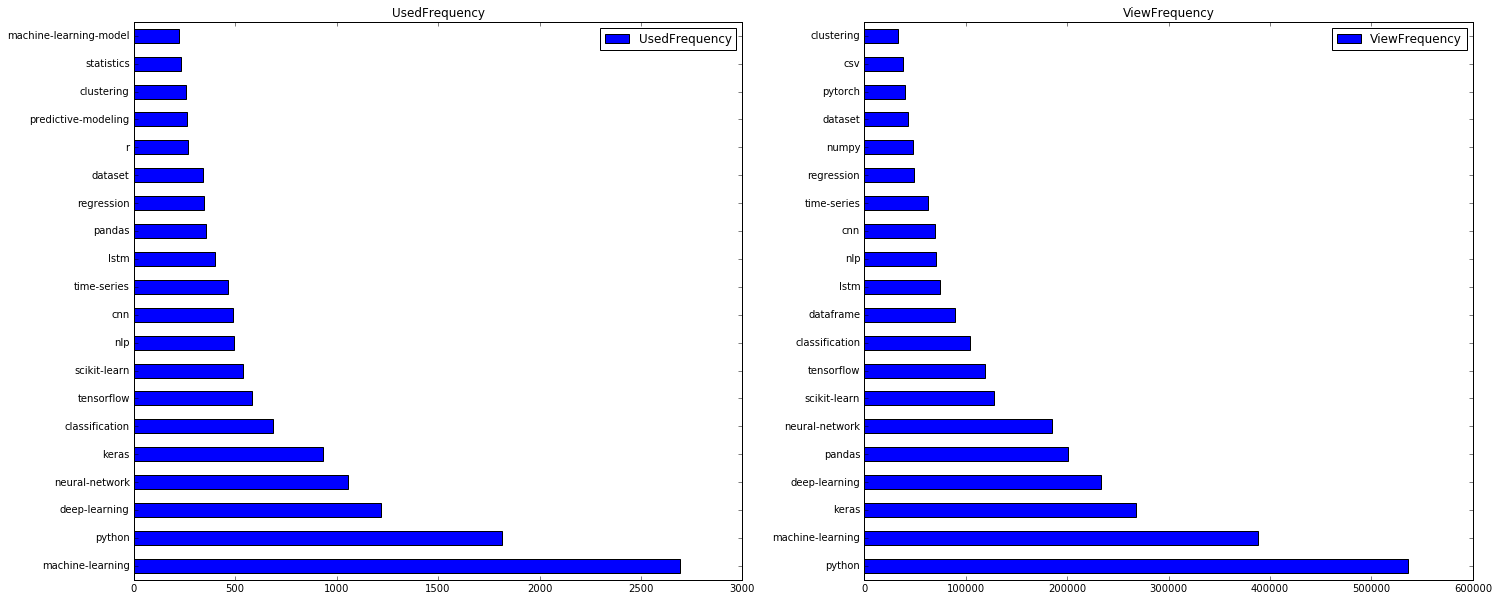

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
top_twenty_used_tags.plot(kind="barh", ax=axes[0], subplots=True)
top_twenty_viewed_tags.plot(kind="barh", ax=axes[1], subplots=True)

## Relations Between Tags

Looking at the results, we see that most top tags are present in both dataframes.  
Let's see what tags are in the most used, but not in most viewed.

In [16]:
# using ViewFrequency if NaN 
in_used = pd.merge(top_twenty_used_tags, top_twenty_viewed_tags, how="left", left_index=True, right_index=True)
#checking the overlap
in_used

,UsedFrequency,ViewFrequency
machine-learning,2693,388479.0
python,1814,535935.0
deep-learning,1220,233045.0
neural-network,1055,185342.0
keras,935,268025.0
classification,685,104397.0
tensorflow,584,119560.0
scikit-learn,540,128056.0
nlp,493,71278.0
cnn,489,69766.0


What about the other way around which tags are in the most viewed, but not in most used.

In [17]:
# using UsedFrequency if NaN 
in_viewed= pd.merge(top_twenty_used_tags, top_twenty_viewed_tags, how="right", left_index=True, right_index=True)
#checking the overlap
in_viewed

,UsedFrequency,ViewFrequency
python,1814.0,535935
machine-learning,2693.0,388479
keras,935.0,268025
deep-learning,1220.0,233045
pandas,354.0,200576
neural-network,1055.0,185342
scikit-learn,540.0,128056
tensorflow,584.0,119560
classification,685.0,104397
dataframe,NaN,89281


* The tags present in the most used and not present in most viewed are:
    * <mark>r</mark> 
    * <mark>predictive-modeling</mark>
    * <mark>statistics</mark>
    * <mark>machine-learning-model</mark>  


* And the tags present in most_viewed but not in most_used are:
    * <mark>csv</mark>
    * <mark>pytorch</mark>
    * <mark>dataframe</mark>

Some tags also stand out as being related. For example, <mark>python</mark> is related to <mark>pandas</mark>, as we can find both pythons and pandas in the same country — or better yet, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.  

Other pairs of tags, shouldn't be related at all, like <mark>pandas</mark> and <mark>r</mark>

### A bit deeper 
One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

In [18]:
# list of all tags
all_tags = list(tag_count_frequency.index)
# dataframe of all tags
associations = pd.DataFrame(index=all_tags, columns=all_tags)
# filling with 0
associations.fillna(0, inplace=True)
# filling with correct values
for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

This dataframe(associations) is quite large. We will focus our attention on the most used tags.

In [19]:
relations_most_used = associations.loc[top_twenty_used_tags.index, top_twenty_used_tags.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


he cells highlighted in yellow tell us that <mark>time-series</mark> was used together with <mark>r</mark> 22 times.  
It's hard for a human eye to catch what is going on in this dataframe. Let's create a heatmap. That will help convey the results fasters. 

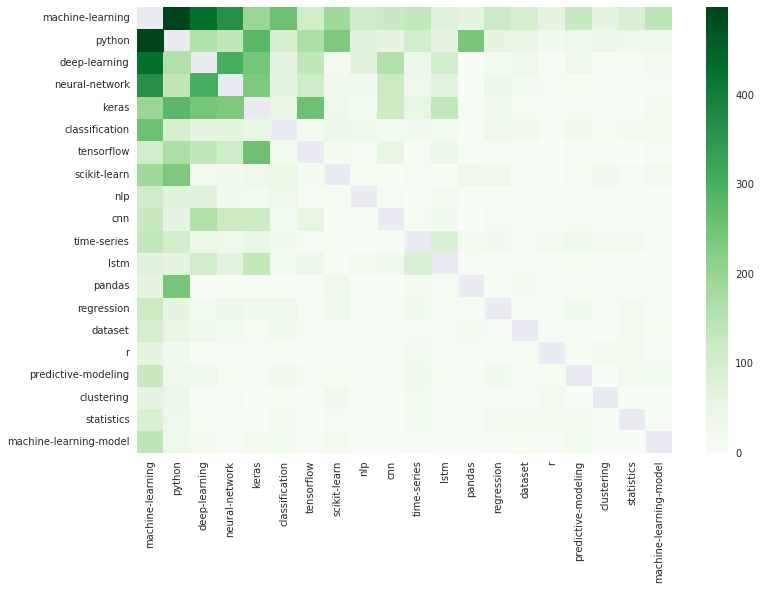

In [20]:
#import needed library
import seaborn as sns
# removing the color in the heatmap for the daigonal. tags with themselves
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN
# plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the upper left corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

so for further analysis can be done to dive deeper into their association and independence building a better understanding of tags relations.

## Enter Domain Knowledge

You may have noticed that the most used tags are also the most viewed ones. From the top 10 tags of each, here's a list of the tags in common: <mark>python</mark>, <mark>machine-learning</mark>, <mark>deep-learning</mark>, <mark>neural-network</mark>, <mark>keras</mark>, <mark>tensorflow</mark>, <mark>classification</mark>, <mark>scikit-learn</mark>.  

Do you know what each of these or most of these tags means? Could there be strong relations between them?  
This where domain knowledge would be of a great help so we can understand why this happens.  

[Keras](https://keras.io/), [scikit-learn](https://scikit-learn.org/stable/), [TensorFlow](https://www.tensorflow.org/) are all Python libraries that allow their users to employ deep learning (a type of neural network). Most of the top tags are all intimately related with one central machine learning theme: deep learning. At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).  

## Just a Fad?

Before we make our recommendation, we would like to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down? 

We will query all of the questions ever asked on DSSE, their dates and tags.

The file all_questions.csv holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

#### Query 2019  
<pre>
SELECT 
    Id,
    CreationDate,
    Tags
  FROM posts
WHERE
    PostTypeId = 1
    AND
    CreationDate <= 2019;
</pre>

We will track the interest in deep learning across time. We will:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period.

In [21]:
# reading data about all questions
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]
# exploring all_questions
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21117 entries, 0 to 21575
Data columns (total 3 columns):
Id              21117 non-null int64
CreationDate    21117 non-null datetime64[ns]
Tags            21117 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 659.9+ KB


In [22]:
# exploring all_questions
all_questions.head(5)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [23]:
# Transform the tags column in a similar manner to what was previously done.
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "").str.split("><")
# exploring all_questions after transforming
all_questions.head(5)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


Firstly we will define what tags are deep learning tags.  
The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].  
This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning.

In [24]:
# identify deep learning questions
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm","cnn","scikit-learn","tensorflow","keras","neural-network","deep-learning"]:
            return 1
    return 0

all_questions["DeepLearning"] = all_questions["Tags"].apply(class_deep_learning)

# checking output of identifying deep learning questions
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning
15198,44595,2019-01-26 03:53:11,"[keras, multiclass-classification]",1
13781,22306,2017-08-16 14:13:30,"[data-mining, nlp, information-retrieval]",0
4361,26367,2018-01-07 01:10:30,"[tensorflow, object-recognition]",1
7934,48941,2019-04-09 07:50:45,"[rnn, pytorch]",0
14640,10621,2016-03-09 15:27:17,"[classification, clustering, algorithms, weka,...",0


The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

In [25]:
# which quarter 
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)

# checking output of identifying which quarter
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning,Quarter
11278,61259,2019-10-04 14:17:47,[supervised-learning],0,19Q4
2261,46456,2019-03-01 09:22:37,"[machine-learning, python, dataset, training, ...",0,19Q1
7867,6604,2015-07-28 08:53:18,[regression],0,15Q3
8857,8094,2015-09-14 22:05:19,"[algorithms, predictive-modeling, regression, ...",0,15Q3
5399,47787,2019-03-22 13:02:40,"[machine-learning, neural-network]",1,19Q1


Grouping by quarter:

* Count of the number of deep learning questions.
* Count of the total number of questions.
* The ratio between the two numbers above. (DeepLearningRate)

In [26]:
# grouping by quarter and aggregating 
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]

# resetting index to help with visualizations later.
quarterly=quarterly.reset_index()

# checking the group by steps
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
5,15Q3,45,311,0.144695
2,14Q4,21,216,0.097222
17,18Q3,685,1512,0.453042
12,17Q2,226,647,0.349304
9,16Q3,161,585,0.275214


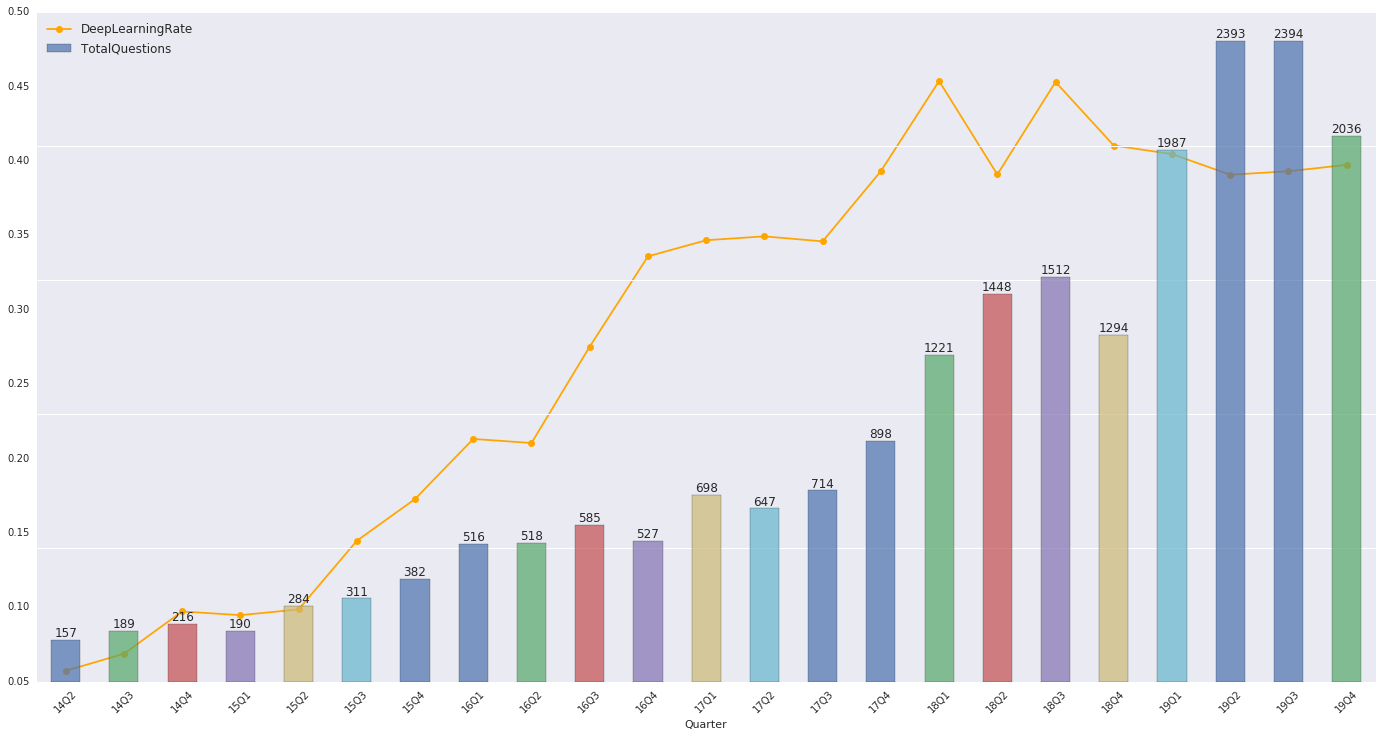

In [27]:
# plotting DeepLearningRate across quarters
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that interest in deep learning has been increasing since the start of  [Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com) and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing however it is not increasing at the same rate like before.   

At the end we maintain our previous idea of proposing that we create deep learning content for our users.